# Books Data

In [1]:
import pandas as pd

books_data = pd.read_csv("../data/raw/books_data.csv")

In [2]:
books_data.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [3]:
books_data.sample(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
152357,Restoring Dolls: A Practical Guide,NaN,['Doreen Perry'],NaN,http://books.google.com/books?id=Ke3CAAAACAAJ&...,NaN,1985,http://books.google.com/books?id=Ke3CAAAACAAJ&...,['Dolls'],NaN
104862,How to Keep Your Tractor Running (Motorbooks W...,Projects included: Service battery and cables ...,['Rick Kubik'],http://books.google.com/books/content?id=-Ojwn...,http://books.google.com/books?id=-OjwnQEACAAJ&...,Voyageur Press,2005,http://books.google.com/books?id=-OjwnQEACAAJ&...,['Technology & Engineering'],NaN
73702,Rare Views,Catalogue of a loan exhibition of rare views o...,['Joshua Hawkins Jordan'],http://books.google.com/books/content?id=2JOSB...,http://books.google.com/books?id=2JOSBgAAQBAJ&...,Joshua Hawkins Jordan,1909,https://play.google.com/store/books/details?id...,['Art'],NaN


In [4]:
books_data.head(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


In [5]:
import seaborn as sns
sns.set_theme()

In [6]:
def generate_null_viz(df):
    null_percentages = (df.isna().sum() / df.shape[0] * 100).reset_index()
    null_percentages.columns = ["column", "null%"]
    ax = sns.barplot(
        data=null_percentages,
        y="column",
        x="null%",
    )
    ax.set(xlim=(0, 100))
    print(null_percentages)

          column      null%
0          Title   0.000471
1    description  32.222557
2        authors  14.789270
3          image  24.516958
4    previewLink  11.222011
5      publisher  35.727199
6  publishedDate  11.913617
7       infoLink  11.222011
8     categories  19.396527
9   ratingsCount  76.576712


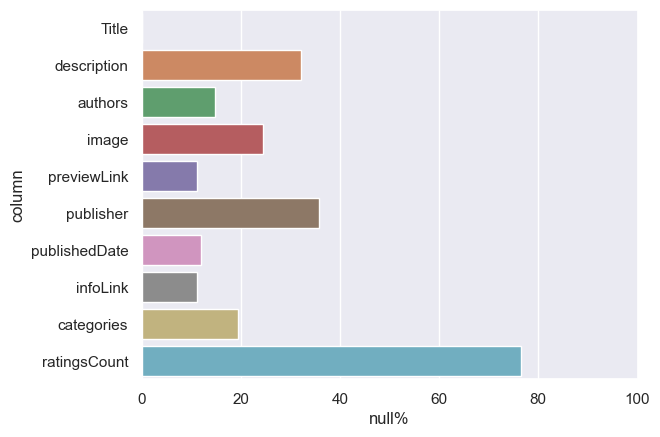

In [7]:
generate_null_viz(books_data)

## Title

Only one book without Title

In [8]:
books_data[books_data.Title.isna()]

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
1066,NaN,NaN,['Maharshi Ramana'],http://books.google.com/books/content?id=uq0uj...,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,2015-12-15,http://books.google.nl/books?id=uq0ujwEACAAJ&d...,NaN,1.0


## Missing Descriptions

Description has 32% of missing values. This is column is very important because the project aims at building a hybrid recommender system and this field has the richest natural language data about an item. If we are going to judge a book by its cover, we should at least read the description.

          column       null%
0          Title    0.001461
1    description  100.000000
2        authors   42.672628
3          image   65.851378
4    previewLink   34.826568
5      publisher   83.425382
6  publishedDate   36.365097
7       infoLink   34.826568
8     categories   51.320826
9   ratingsCount   93.242453


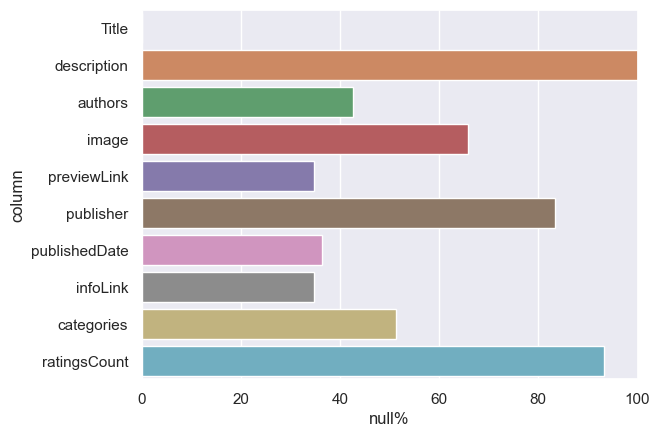

In [9]:
generate_null_viz(books_data[books_data.description.isna()])

34% out of those items with a missing description also lack a infoLink that could be used to webscrap a description in some way.

## Authors

In [10]:
import ast

author_count = books_data.authors.fillna("[]").apply(ast.literal_eval).explode().value_counts()

In [11]:
author_count.head(15)

authors
Rose Arny                                236
William Shakespeare                      228
Library of Congress. Copyright Office    178
Agatha Christie                          148
Erle Stanley Gardner                     128
Louis L'Amour                            125
Charles Dickens                          108
Isaac Asimov                              96
Mark Twain                                90
Edgar Rice Burroughs                      89
Rudyard Kipling                           86
Francine Pascal                           84
Various                                   78
Library of Congress                       77
Zane Grey                                 76
Name: count, dtype: int64

We find that a Power Law probably exists in regards to how many books an author has

<Axes: ylabel='authors'>

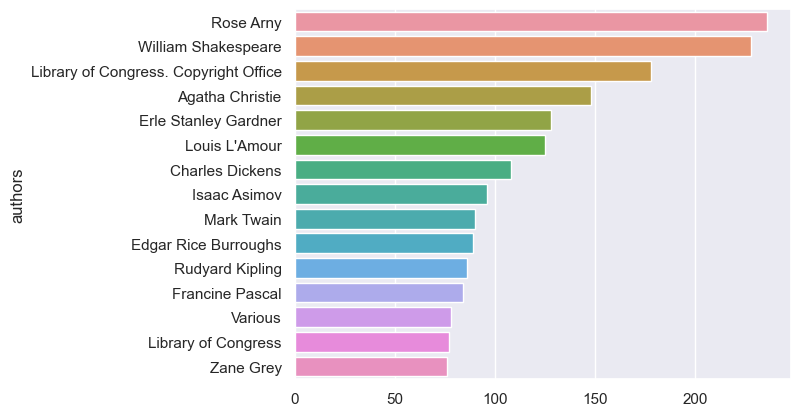

In [12]:
sns.barplot(
    x=author_count.head(15).values,
    y=author_count.head(15).index,
)

We can also notice that the authors with more publications are usually regarded as very popular. It makes sense, as a very popular author has a great chance of having their books published many times with different editions and publishers, even posthumously.

<Axes: >

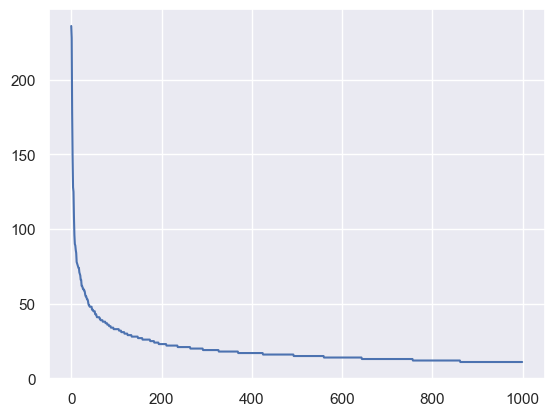

In [13]:
sns.lineplot(author_count.head(1000).values)

<Axes: xlabel='Book_Count', ylabel='Count'>

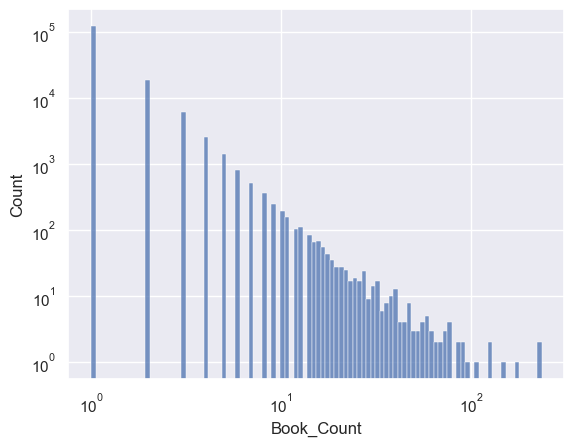

In [14]:
data = author_count.reset_index()
data.columns = ['Author', 'Book_Count']
sns.histplot(data['Book_Count'], bins=100, kde=False, log_scale=(True, True))

Although the log-log visualization strongly suggests that this in fact is a power law distribution, we would probably need to double check with a more precise method than just a visualization. If we can confirm the power law dynamics, in the case of adding the number of contributions as a feature in, let's say, a ranker, we would need to compensate for this power law. 

## PublishedDate

We notice non-standardized date formatting

In [15]:
books_data.publishedDate.sample(10)

33693     2008-12-14
181834           NaN
50625           1920
55330     2009-01-16
153939    2013-09-06
17051     2018-04-06
86728        2011-03
85615     2020-06-10
199571    2013-01-22
149408    2013-05-07
Name: publishedDate, dtype: object

We can even see special characters

In [16]:
books_data.publishedDate[books_data.publishedDate.str.contains("[^\\d-]").fillna(False)].sample(100).values

array(['1975*', '2017-07-01T21:39:48Z', '200?', '19??', '197?', '199?',
       '19??', '1971*', '2006*', '19??', '197?', '19??', '200?', '1947*',
       '1963*', '198?', '2021-11-10T14:52:00Z', '1992*',
       '2022-06-27T17:16:15Z', '1970*', '2022-06-28T00:00:00+02:00',
       '2013-11-22T00:00:00+01:00', '196?', '2022-05-12T00:00:00Z',
       '1951*', '2000*', '2005*', '194?', '19??', '200?', '2000*', '198?',
       '19??', '197?', '2022-03-20T21:28:18Z', '1980*', '19??', '1973*',
       '1983*', '1945*', '19??', '1947*', '199?', '19??', '200?',
       '2021-11-23T14:14:00Z', '2022-05-09T22:59:00Z',
       '2016-11-15T00:00:00+01:00', '1978*', '19??', '1960*',
       '2017-12-29T00:46:06Z', '196?', '1928*', '2005*', '1935*', '196?',
       '19??', '1974*', '1933*', '1974*', '198?', '2017-03-26T04:39:04Z',
       '2005*', '1870*', '19??', '1994*', '19??', '1994*', '197?', '198?',
       '1977*', '2022-01-05T05:05:41Z', '1980*', '2003*',
       '2020-07-21T18:13:34Z', '187?', '1984*', 

Fortunately, most of the dates can be inferred, even if some of them could be more challenging

In [17]:
books_data.publishedDate[~books_data.publishedDate.str.contains("[^\\d-]").fillna(False)].values[1552]

'2003-10'

In [50]:
dates = pd.to_datetime(
    books_data.publishedDate[books_data.publishedDate.str.match("\\d+-\\d+-\\d+").fillna(False)],
    format='mixed',
    errors="coerce",
    utc=True,
)

In [51]:
dates = dates[~dates.isna()]

<Axes: xlabel='publishedDate', ylabel='Count'>

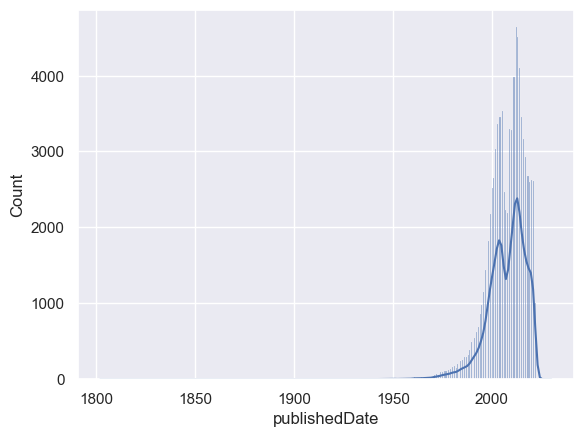

In [57]:
sns.histplot(dates.dt.year, kde=True)

The majority of the dates seem to be from the 2000s. However, this distribution might be biased since we dropped many years such as 19**, which could indicate books of unknown certain date.

## Categories

<Axes: ylabel='categories'>

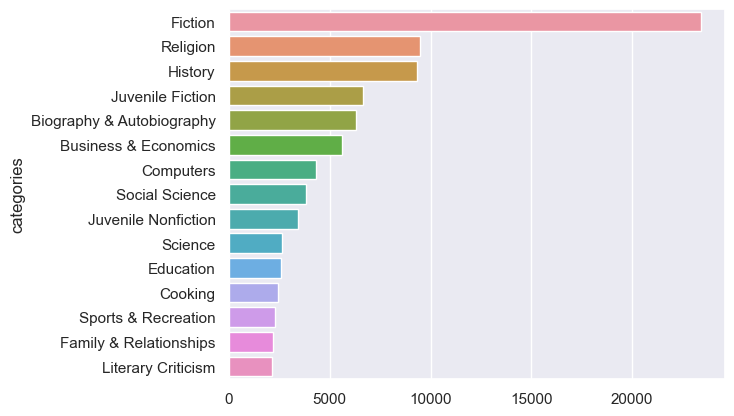

In [62]:
category_count = books_data.categories.fillna("[]").apply(ast.literal_eval).explode().value_counts()
sns.barplot(
    x=category_count.head(15).values,
    y=category_count.head(15).index,
)

<Axes: xlabel='Book_Count', ylabel='Count'>

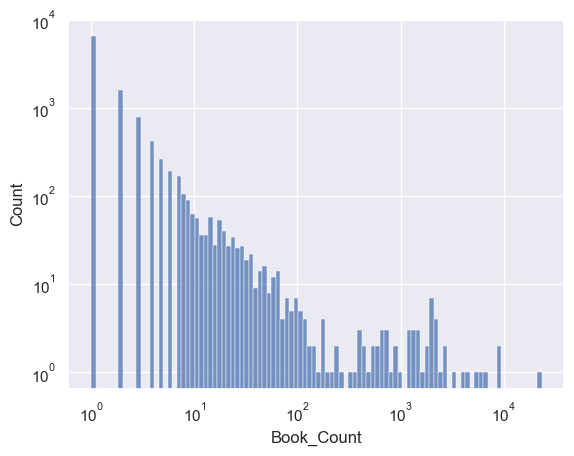

In [65]:
data = category_count.reset_index()
data.columns = ['Category', 'Book_Count']
sns.histplot(data['Book_Count'], bins=100, kde=False, log_scale=(True, True))

This variable also seem to follow a power law distribution.

# Reviews Data

In [68]:
reviews_data = pd.read_csv("../data/raw/Books_rating.csv")

In [69]:
reviews_data.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  3000000 non-null  object 
 1   Title               2999792 non-null  object 
 2   Price               481171 non-null   float64
 3   User_id             2438213 non-null  object 
 4   profileName         2438095 non-null  object 
 5   review/helpfulness  3000000 non-null  object 
 6   review/score        3000000 non-null  float64
 7   review/time         3000000 non-null  int64  
 8   review/summary      2999593 non-null  object 
 9   review/text         2999992 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [70]:
reviews_data.sample(3)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2712890,0803746105,From the captain to the colonel: An informal h...,NaN,A2I143INOP6L2Z,poor service,0/3,1.0,1282176000,Very poor condition,Even tho the book was described as used there ...
1593447,B000NTDOXS,The Once and Future King,NaN,NaN,NaN,1/1,5.0,929059200,The greatest book ever written,Truly the greatest book ever written. It is di...
2646079,B000J2OBYA,A ROOM WITH A VIEW.,NaN,A2QI8DMH2ECWYP,Kimberly Baker,1/1,5.0,1353801600,Good Kindle version,After having read some of the reviews of the f...


Strangely, we have some attributes that would normally belong to the books dataframe, such as Title and Price. These might make sense for the Price attribute, as it could change overtime. However, the title seems redundant.

               column      null%
0                  Id   0.000000
1               Title   0.006933
2               Price  83.960967
3             User_id  18.726233
4         profileName  18.730167
5  review/helpfulness   0.000000
6        review/score   0.000000
7         review/time   0.000000
8      review/summary   0.013567
9         review/text   0.000267


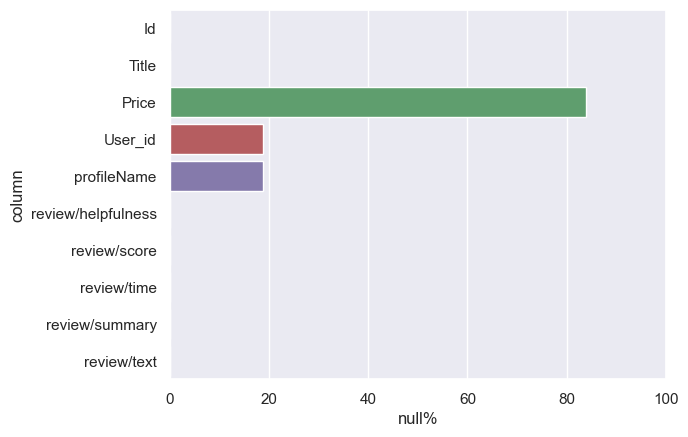

In [71]:
generate_null_viz(reviews_data)

## User Review Count

In [82]:
user_count = reviews_data.User_id.value_counts()

<Axes: xlabel='count', ylabel='User_id'>

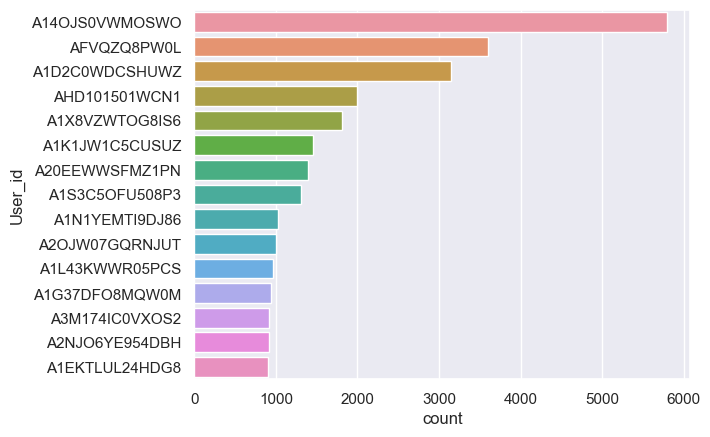

In [83]:
sns.barplot(
    data=user_count.reset_index().head(15),
    y="User_id",
    x="count",
)

<Axes: xlabel='Review_Count', ylabel='Count'>

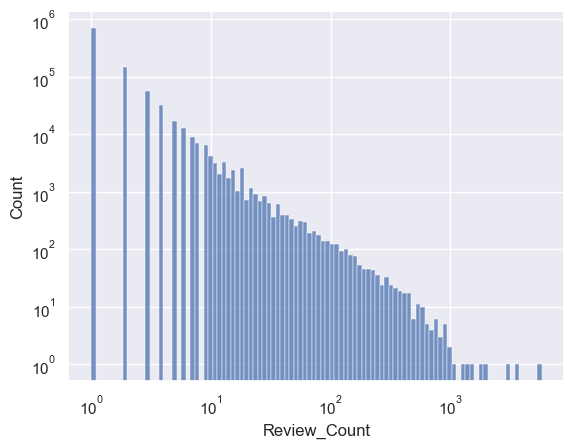

In [84]:
data = user_count.reset_index()
data.columns = ['User_id', 'Review_Count']
sns.histplot(data['Review_Count'], bins=100, kde=False, log_scale=(True, True))

We also se a power law distribution in this variable

## Review

<Axes: xlabel='review/score', ylabel='count'>

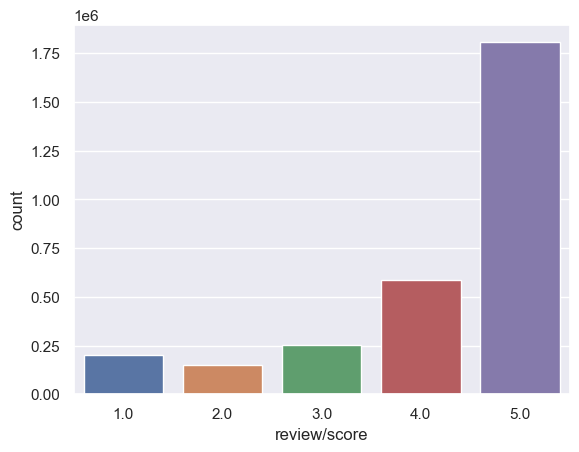

In [91]:
sns.barplot(
    data=reviews_data["review/score"].value_counts().reset_index(),
    x="review/score",
    y="count"
)

We can see that we have a positive bias. This might mean that people tend to only review goods that they like.

## Review Text

In [94]:
reviews_data["review/text"]

0          This is only for Julie Strain fans. It's a col...
1          I don't care much for Dr. Seuss but after read...
2          If people become the books they read and if "t...
3          Theodore Seuss Geisel (1904-1991), aka &quot;D...
4          Philip Nel - Dr. Seuss: American IconThis is b...
                                 ...                        
2999995    This is an extremely difficult book to digest,...
2999996    This is pretty interesting. Collingwood seems ...
2999997    This is a good book but very esoteric. "What i...
2999998    My daughter, a freshman at Indiana University,...
2999999    The guy has a few good ideas but, reader, bewa...
Name: review/text, Length: 3000000, dtype: object

In [93]:
reviews_data["review/summary"]

0                     Nice collection of Julie Strain images
1                                          Really Enjoyed It
2            Essential for every personal and Public Library
3            Phlip Nel gives silly Seuss a serious treatment
4                                     Good academic overview
                                 ...                        
2999995                                            Difficult
2999996        Quite good and ahead of its time occasionally
2999997    Easier reads of those not well versed in histo...
2999998     Yes, it is cheaper than the University Bookstore
2999999    Collingwood's ideas sink in a quagmire or verb...
Name: review/summary, Length: 3000000, dtype: object

<Axes: ylabel='Count'>

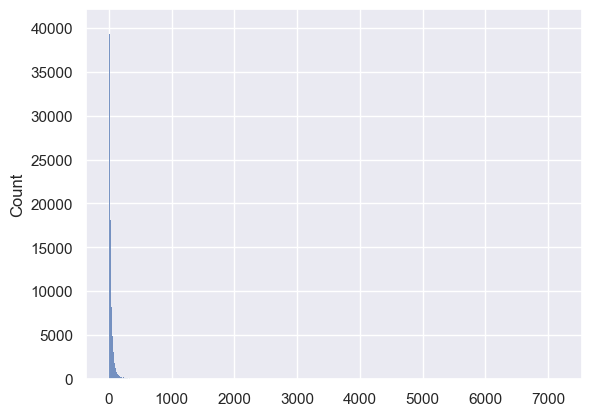

In [97]:
sns.histplot(reviews_data["review/text"].str.len() / reviews_data["review/summary"].str.len())

Unfortunaly, no details are given as to exactly how these summaries were generated, but they seem accurate at first glance.